## **Import necessary libraries**

In [1]:
# Import necessary libraries
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import numpy for numerical computations
from sklearn.model_selection import train_test_split  # Import train_test_split to split data into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Import StandardScaler for feature scaling and LabelEncoder for encoding categorical variables
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression for logistic regression modeling
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier for random forest modeling
from sklearn.metrics import classification_report, roc_auc_score  # Import classification_report and roc_auc_score for model evaluation
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance by oversampling the minority class
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns  # Import seaborn for enhanced data visualization
import xgboost as xgb

# **LOADING DATASET**

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Define the file path
file_path = "/content/drive/My Drive/creditcard.csv"

#Load the dataset
df = pd.read_csv(file_path)

Mounted at /content/drive


# **DATA PREPROCESSING**

In [3]:
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')  # Standardize column names for consistency

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())  # Print the count of missing values for each column in the dataset

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill missing numerical values with the mean of each column
df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing categorical values with the mode (most frequent value) of each column

# Encode categorical variables
label_encoders = {}  # Initialize a dictionary to store label encoders for each categorical column
for col in df.select_dtypes(include=['object']).columns:  # Loop through all categorical columns
    le = LabelEncoder()  # Initialize a LabelEncoder object
    df[col] = le.fit_transform(df[col])  # Encode the categorical column into numerical values
    label_encoders[col] = le  # Store the encoder in the dictionary for potential inverse transformation later

# Scale numerical features
scaler = StandardScaler()  # Initialize a StandardScaler object for feature scaling
numerical_cols = df.select_dtypes(include=['number']).columns  # Select all numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])  # Scale numerical features to have mean=0 and std=1


Missing values per column:
time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64


# **Removing duplicate data**

In [4]:
#Removing duplicate data
print("Number of rows before removing duplicates:", len(df))
df = df.drop_duplicates()  # Remove duplicate rows
print("Number of rows after removing duplicates:", len(df))

print("\n Preprocessing Done!\n")

Number of rows before removing duplicates: 284807
Number of rows after removing duplicates: 283726

 Preprocessing Done!



# **DATASET INFORMATION**

In [5]:
#Display dataset information
print("\n🔹 Dataset Overview:")
print(df.info())


🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    283726 non-null  float64
 1   v1      283726 non-null  float64
 2   v2      283726 non-null  float64
 3   v3      283726 non-null  float64
 4   v4      283726 non-null  float64
 5   v5      283726 non-null  float64
 6   v6      283726 non-null  float64
 7   v7      283726 non-null  float64
 8   v8      283726 non-null  float64
 9   v9      283726 non-null  float64
 10  v10     283726 non-null  float64
 11  v11     283726 non-null  float64
 12  v12     283726 non-null  float64
 13  v13     283726 non-null  float64
 14  v14     283726 non-null  float64
 15  v15     283726 non-null  float64
 16  v16     283726 non-null  float64
 17  v17     283726 non-null  float64
 18  v18     283726 non-null  float64
 19  v19     283726 non-null  float64
 20  v20     283726 non-null  float64

In [6]:
#Display the first few rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
       time        v1        v2        v3        v4        v5        v6  \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         v7        v8        v9  ...       v21       v22       v23       v24  \
0  0.193679  0.082637  0.331128  ... -0.024923  0.382854 -0.176911  0.110507   
1 -0.063700  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201 -0.561131   
2  0.639776  0.207373 -1.378675  ...  0.337632  1.063358  1.456320 -1.138092   
3  0.192071  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777 -1.941027   
4  0.479302 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123  0.233250   

        v25       v26       v27       v28    amount

# **STATISTICS OF DATASET**

In [7]:
#Getting basic statistics)
print("\nDataset Summary:")
print(df.describe())


Dataset Summary:
                time             v1             v2             v3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.000059       0.003021      -0.002504       0.001064   
std         0.999852       0.994554       0.997213       0.995007   
min        -1.996583     -28.798555     -44.035292     -31.871733   
25%        -0.855144      -0.467634      -0.363543      -0.586764   
50%        -0.213135       0.010407       0.038726       0.118689   
75%         0.936744       0.671911       0.484636       0.677301   
max         1.642058       1.253351      13.357750       6.187993   

                  v4             v5             v6             v7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002095       0.001324      -0.000855       0.001456   
std         0.998812       0.997655       0.999746       0.992379   
min        -4.013919     -82.408097     -19.636058     -35.209396   
25%        -0.6

# **CLASS DISTRIBUTION**

<ipython-input-8-4930a3aa77a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='class', data=df, palette=['green', 'red'])  # Create a count plot for 'class' with green for non-fraud and red for fraud


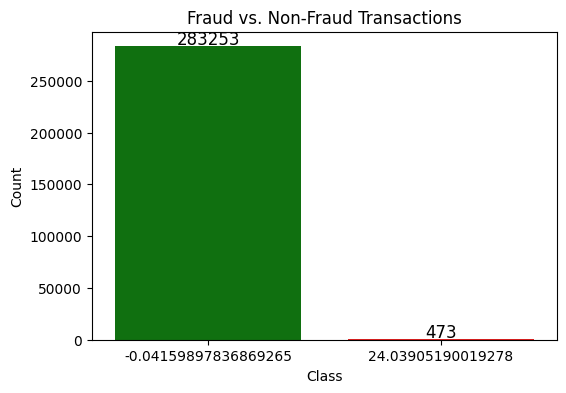


🔹 Fraud Percentage:
 class
-0.041599     99.83329
 24.039052     0.16671
Name: proportion, dtype: float64

Class Distribution:
class
-0.041599     283253
 24.039052       473
Name: count, dtype: int64


In [8]:
# Check fraud vs. non-fraud transactions
if 'class' in df.columns:  # Check if the 'class' column exists in the DataFrame
    plt.figure(figsize=(6,4))  # Set the figure size for the plot
    ax = sns.countplot(x='class', data=df, palette=['green', 'red'])  # Create a count plot for 'class' with green for non-fraud and red for fraud
    plt.title("Fraud vs. Non-Fraud Transactions")  # Set the title of the plot
    plt.xlabel("Class")  # Label the x-axis
    plt.ylabel("Count")  # Label the y-axis

    # Add the count annotations above each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5),  # Offset the label a little above the bar
                    textcoords='offset points')

    plt.show()  # Display the plot

    fraud_percentage = df['class'].value_counts(normalize=True) * 100  # Calculate the percentage of fraud and non-fraud transactions
    print("\n🔹 Fraud Percentage:\n", fraud_percentage)  # Print the percentage of fraud and non-fraud transactions

# Print the distribution of the target variable (Class)
print("\nClass Distribution:")
print(df['class'].value_counts())  # Print the count of fraud and non-fraud transactions in the dataset


# **FEATURE IMPORTANCE (BEFORE SMOTE)**


🔹 Top 10 Important Features:
   Feature  Importance
17     v17    0.146964
14     v14    0.138823
12     v12    0.129110
10     v10    0.076921
16     v16    0.066506
11     v11    0.056201
9       v9    0.038508
18     v18    0.030961
4       v4    0.028785
7       v7    0.025513


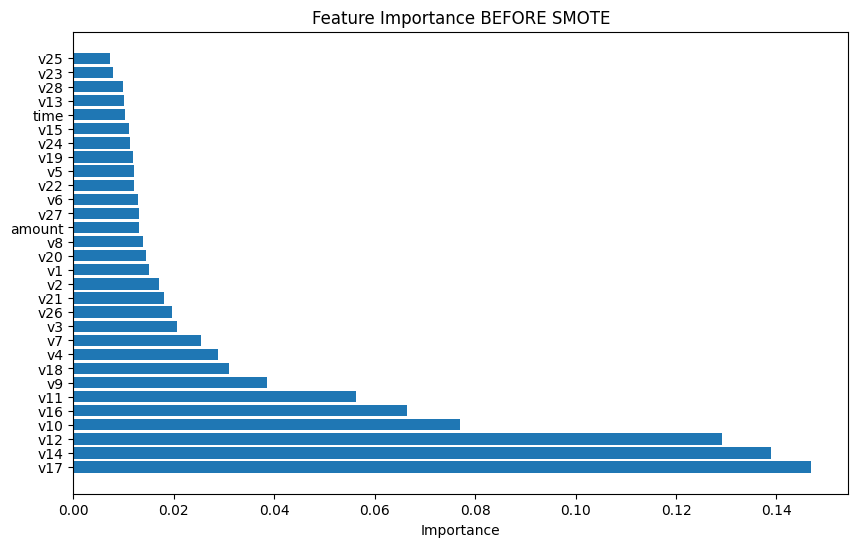

In [9]:
#Feature Importance
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing features and target variable 'class'
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

# Ensure 'y' is of integer type to represent discrete classes
y = y.astype(int)  # Convert to integer type if it's not already

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create a Random Forest model to evaluate feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("\n🔹 Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance BEFORE SMOTE')
plt.show()

# **TRAINING MODELS (BEFORE SMOTE)**

In [10]:
# Import necessary libraries
import pandas as pd  # For data manipulation and loading CSV files
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
import xgboost as xgb  # Importing XGBoost classifier
import joblib  # For saving trained models and scaler

# Define the file path for the dataset
file_path = "/content/drive/My Drive/creditcard.csv"

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)  # Read CSV file into DataFrame

# Step 1: Split the data into features (X) and target (y)
X = df.drop(columns=['Class'])  # Drop the target column to get feature variables
y = df['Class']  # Extract the target column (fraud vs. non-fraud transactions)

# Step 2: Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Split into 70% train and 30% test

# Step 3: Feature Scaling (only for Logistic Regression)
scaler = StandardScaler()  # Create a standard scaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler

# Step 4: Train Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)  # Create Logistic Regression model with more iterations
logreg.fit(X_train_scaled, y_train)  # Train model using scaled data

# Step 5: Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Create Random Forest model with 100 decision trees
rf.fit(X_train, y_train)  # Train model using original (unscaled) training data

# Step 6: Train XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)  # Create XGBoost model with 100 decision trees
xgb_model.fit(X_train, y_train)  # Train model using original (unscaled) training data

# Step 7: Save trained models and the scaler (using .save extension)
joblib.dump(logreg, "logistic_regression_model.save")  # Save the trained Logistic Regression model
joblib.dump(rf, "random_forest_model.save")  # Save the trained Random Forest model
joblib.dump(xgb_model, "xgboost_model.save")  # Save the trained XGBoost model
joblib.dump(scaler, "scaler.save")  # Save the StandardScaler used for Logistic Regression

# Final message
print("Models have been trained and saved successfully.")  # Print confirmation message


Models have been trained and saved successfully.


# **PREDICTIONS (BEFORE SMOTE)**

In [11]:
# Import necessary libraries
import joblib  # For loading the saved models and scaler

# Load the trained models and scaler
logreg_loaded = joblib.load("logistic_regression_model.save")  # Load the saved Logistic Regression model
rf_loaded = joblib.load("random_forest_model.save")  # Load the saved Random Forest model
xgb_model_loaded = joblib.load("xgboost_model.save")  # Load the saved XGBoost model
scaler_loaded = joblib.load("scaler.save")  # Load the saved StandardScaler

# Prediction with Logistic Regression (using scaled data)
y_pred_logreg_loaded = logreg_loaded.predict(X_test_scaled)  # Make predictions on the test data

# Prediction with Random Forest (using original data)
y_pred_rf_loaded = rf_loaded.predict(X_test)  # Make predictions on the test data

# Prediction with XGBoost (using original data)
y_pred_xgb_loaded = xgb_model_loaded.predict(X_test)  # Make predictions on the test data

# Print some of the predictions to verify
print("\nPredictions using Logistic Regression model:")
print(y_pred_logreg_loaded[:5])  # Print the first 5 predictions

print("\nPredictions using Random Forest model:")
print(y_pred_rf_loaded[:5])  # Print the first 5 predictions

print("\nPredictions using XGBoost model:")
print(y_pred_xgb_loaded[:5])  # Print the first 5 predictions



Predictions using Logistic Regression model:
[1 0 0 0 0]

Predictions using Random Forest model:
[1 0 0 0 0]

Predictions using XGBoost model:
[1 0 0 0 0]


# **MODELS EVALUATION (BEFORE SMOTE)**

Models Evaluation BEFORE SMOTE.

Logistic Regression Model Evaluation:
Accuracy: 0.9992509626300574
Precision: 0.8673469387755102
Recall: 0.625
F1-score: 0.7264957264957265
AUC-ROC: 0.9802441045111117
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



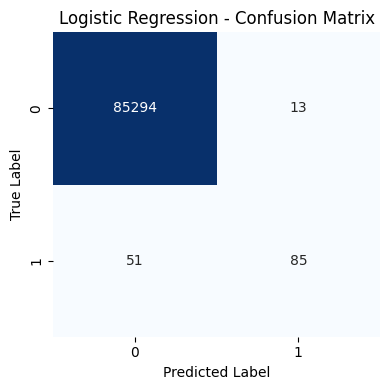


Random Forest Model Evaluation:
Accuracy: 0.9996137776061234
Precision: 0.9478260869565217
Recall: 0.8014705882352942
F1-score: 0.8685258964143426
AUC-ROC: 0.9620522400409869
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



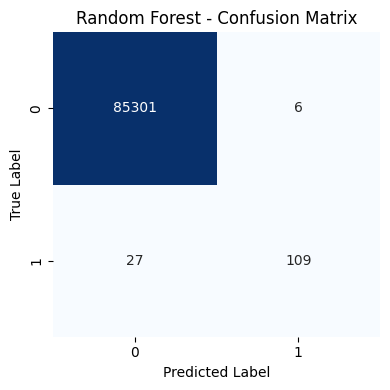


XGBoost Model Evaluation:
Accuracy: 0.9996137776061234
Precision: 0.9327731092436975
Recall: 0.8161764705882353
F1-score: 0.8705882352941177
AUC-ROC: 0.9859835824796118
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



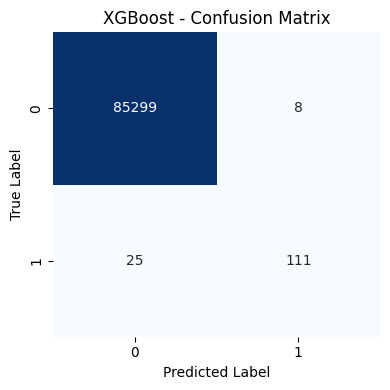

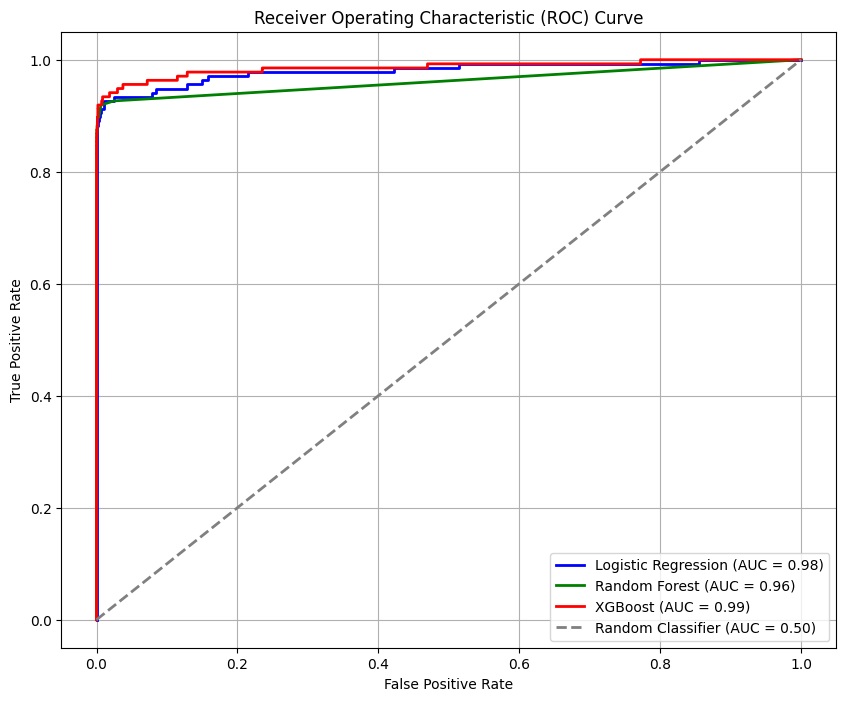

In [12]:
# Import necessary evaluation metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt  # For plotting ROC curves and confusion matrix
import seaborn as sns  # For heatmap visualization of confusion matrix

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
    plt.figure(figsize=(4, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # Create heatmap
    plt.title(f'{model_name} - Confusion Matrix')  # Set title
    plt.xlabel('Predicted Label')  # Label x-axis
    plt.ylabel('True Label')  # Label y-axis
    plt.tight_layout()
    plt.show()  # Display plot

print("Models Evaluation BEFORE SMOTE.")

# Logistic Regression Evaluation
y_pred_logreg = logreg.predict(X_test_scaled)  # Predict class labels for test data
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]  # Get probability scores for ROC-AUC calculation

# Print evaluation metrics for Logistic Regression
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))  # Compute accuracy
print("Precision:", precision_score(y_test, y_pred_logreg))  # Compute precision
print("Recall:", recall_score(y_test, y_pred_logreg))  # Compute recall
print("F1-score:", f1_score(y_test, y_pred_logreg))  # Compute F1-score
print("AUC-ROC:", roc_auc_score(y_test, y_prob_logreg))  # Compute AUC-ROC score
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))  # Print full classification report

# Plot confusion matrix for Logistic Regression
plot_conf_matrix(y_test, y_pred_logreg, "Logistic Regression")  # Display confusion matrix

# Plot ROC Curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)  # Compute ROC curve values
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)  # Compute area under ROC curve

# Random Forest Evaluation
y_pred_rf = rf.predict(X_test)  # Predict class labels for test data
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Get probability scores for ROC-AUC calculation

# Print evaluation metrics for Random Forest
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))  # Compute accuracy
print("Precision:", precision_score(y_test, y_pred_rf))  # Compute precision
print("Recall:", recall_score(y_test, y_pred_rf))  # Compute recall
print("F1-score:", f1_score(y_test, y_pred_rf))  # Compute F1-score
print("AUC-ROC:", roc_auc_score(y_test, y_prob_rf))  # Compute AUC-ROC score
print("Classification Report:\n", classification_report(y_test, y_pred_rf))  # Print full classification report

# Plot confusion matrix for Random Forest
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")  # Display confusion matrix

# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)  # Compute ROC curve values
roc_auc_rf = auc(fpr_rf, tpr_rf)  # Compute area under ROC curve

# XGBoost Evaluation
y_pred_xgb = xgb_model.predict(X_test)  # Predict class labels for test data
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Get probability scores for ROC-AUC calculation

# Print evaluation metrics for XGBoost
print("\nXGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))  # Compute accuracy
print("Precision:", precision_score(y_test, y_pred_xgb))  # Compute precision
print("Recall:", recall_score(y_test, y_pred_xgb))  # Compute recall
print("F1-score:", f1_score(y_test, y_pred_xgb))  # Compute F1-score
print("AUC-ROC:", roc_auc_score(y_test, y_prob_xgb))  # Compute AUC-ROC score
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))  # Print full classification report

# Plot confusion matrix for XGBoost
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost")  # Display confusion matrix

# Plot ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)  # Compute ROC curve values
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)  # Compute area under ROC curve

# Step 6: Plot ROC curves for all models
plt.figure(figsize=(10, 8))  # Set figure size
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')  # Plot Logistic Regression ROC curve
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')  # Plot Random Forest ROC curve
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')  # Plot XGBoost ROC curve
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')  # Plot diagonal reference line (random classifier)
plt.xlabel('False Positive Rate')  # Label x-axis
plt.ylabel('True Positive Rate')  # Label y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set title
plt.legend(loc='lower right')  # Add legend
plt.grid(True)  # Add grid for better readability
plt.show()  # Display plot


# **COMPARING MODELS (BEFORE SMOTE)**

In [13]:
# Compare the models based on their accuracy
print("\nComparison of Models:")

# Define a list of model names
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Compute accuracy scores for each model
accuracies = [
    accuracy_score(y_test, y_pred_logreg),  # Accuracy of Logistic Regression
    accuracy_score(y_test, y_pred_rf),  # Accuracy of Random Forest
    accuracy_score(y_test, y_pred_xgb)  # Accuracy of XGBoost
]

# Loop through each model and print its accuracy
for model, acc in zip(models, accuracies):
    print(f"{model} Accuracy: {acc}")  # Display accuracy for each model



Comparison of Models:
Logistic Regression Accuracy: 0.9992509626300574
Random Forest Accuracy: 0.9996137776061234
XGBoost Accuracy: 0.9996137776061234


# **HYPER PARAMETER TUNING AND EVALAUTING THE MODELS**

In [17]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Logistic Regression Hyperparameter Tuning (Using RandomizedSearchCV) ---
param_dist_logreg = {
    'C': uniform(0.01, 10),  # Regularization strength (random distribution)
    'solver': ['liblinear', 'lbfgs']  # Solvers for logistic regression
}

logreg = LogisticRegression(max_iter=1001, random_state=42)  # Increase max_iter to ensure convergence
random_search_logreg = RandomizedSearchCV(logreg, param_distributions=param_dist_logreg,
                                          n_iter=5, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
random_search_logreg.fit(X_train, y_train)

print("\nBest Parameters for Logistic Regression:", random_search_logreg.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", random_search_logreg.best_score_)

# --- Random Forest Hyperparameter Tuning (Using RandomizedSearchCV) ---
param_dist_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf,
                                      n_iter=5, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
random_search_rf.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", random_search_rf.best_score_)

# --- XGBoost Hyperparameter Tuning (Using RandomizedSearchCV) ---
param_dist_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': [3, 6, 10],
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist_xgb,
                                       n_iter=5, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
random_search_xgb.fit(X_train, y_train)

print("\nBest Parameters for XGBoost:", random_search_xgb.best_params_)
print("Best Cross-Validation Accuracy for XGBoost:", random_search_xgb.best_score_)

# --- Best Models with Hyperparameter Tuning ---
best_logreg = random_search_logreg.best_estimator_
best_rf = random_search_rf.best_estimator_
best_xgb = random_search_xgb.best_estimator_

# --- Model Evaluation on Test Data ---
y_pred_logreg_best = best_logreg.predict(X_test)
print("\nLogistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_logreg_best))

y_pred_rf_best = best_rf.predict(X_test)
print("\nRandom Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_best))

y_pred_xgb_best = best_xgb.predict(X_test)
print("\nXGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb_best))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Best Parameters for Logistic Regression: {'C': np.float64(9.374804397758911), 'solver': 'lbfgs'}
Best Cross-Validation Accuracy for Logistic Regression: 0.9991773841316572
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}
Best Cross-Validation Accuracy for Random Forest: 0.99949338925368
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:12:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters for XGBoost: {'colsample_bytree': np.float64(0.5471016116746761), 'learning_rate': np.float64(0.2036898077765069), 'max_depth': 10, 'n_estimators': 100, 'subsample': np.float64(0.7017481632646403)}
Best Cross-Validation Accuracy for XGBoost: 0.99949338925368

Logistic Regression Test Accuracy: 0.9991924440855307

Random Forest Test Accuracy: 0.9995903701883126

XGBoost Test Accuracy: 0.9996605924417448


# **BALANCING DATASET USING SMOTE**


 New Class Distribution After SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


<ipython-input-18-6615c1f1612d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette=['green', 'red'])  # Create a bar plot showing count of each class


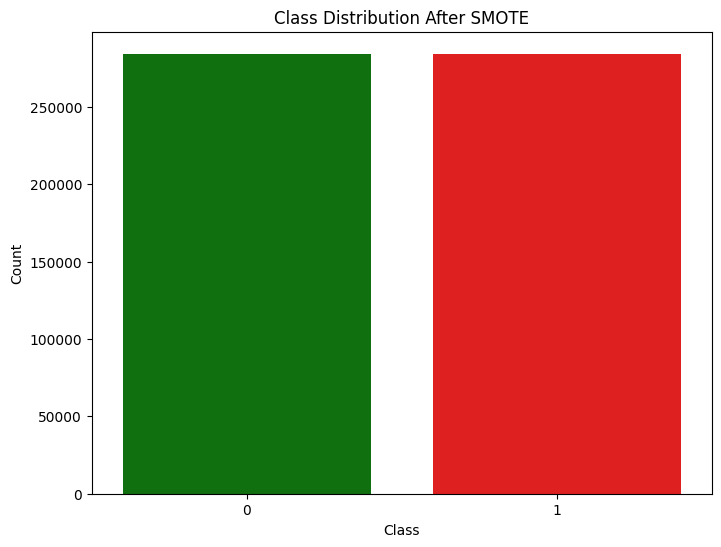

In [18]:
# Import SMOTE from imbalanced-learn to handle class imbalance
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # Create SMOTE object with a 1:1 resampling ratio (fully balanced)
X_resampled, y_resampled = smote.fit_resample(X, y)  # Resample the original dataset (features and target)

# Check the new class distribution after applying SMOTE
print("\n New Class Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())  # Print the count of each class in the resampled dataset

# Visualize the new class distribution using a count plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(x=y_resampled, palette=['green', 'red'])  # Create a bar plot showing count of each class
plt.title('Class Distribution After SMOTE')  # Set the title of the plot
plt.xlabel('Class')  # Label the x-axis
plt.ylabel('Count')  # Label the y-axis
plt.show()  # Display the plot


# **PREPROCESSING AFTER APPLYING SMOTE USING MINMAX**

In [19]:
# Import MinMaxScaler for scaling numerical features between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Select only the numerical columns from the DataFrame (float64 and int64 types)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply MinMax scaling to the numerical columns (transforms data to range [0, 1])
df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

# Display the first 5 rows of the scaled features
print("\n Scaled Features (First 5 Rows):")
print(df[numerical_cols].head())



 Scaled Features (First 5 Rows):
       Time        V1        V2        V3        V4        V5        V6  \
0  0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1  0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2  0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3  0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4  0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.266815  0.786444  0.475312  ...  0.561184  0.522992  0.663793  0.391253   
1  0.264875  0.786298  0.453981  ...  0.557840  0.480237  0.666938  0.336440   
2  0.270177  0.788042  0.410603  ...  0.565477  0.546030  0.678939  0.289354   
3  0.266803  0.789434  0.414999  ...  0.559734  0.510277  0.662607  0.223826   
4  0.268968  0.782484  0.490950  ...  0.561327  0.547271  0.663392  0.401270   

        V25       V26       V27   

# **FEATURE IMPORTANCE (AFTER SMOTE)**


 Top 10 Important Features After SMOTE:
   Feature  Importance
14     V14    0.201771
10     V10    0.128871
12     V12    0.117219
4       V4    0.110991
17     V17    0.086848
3       V3    0.074713
11     V11    0.049675
16     V16    0.043122
2       V2    0.038901
9       V9    0.026571


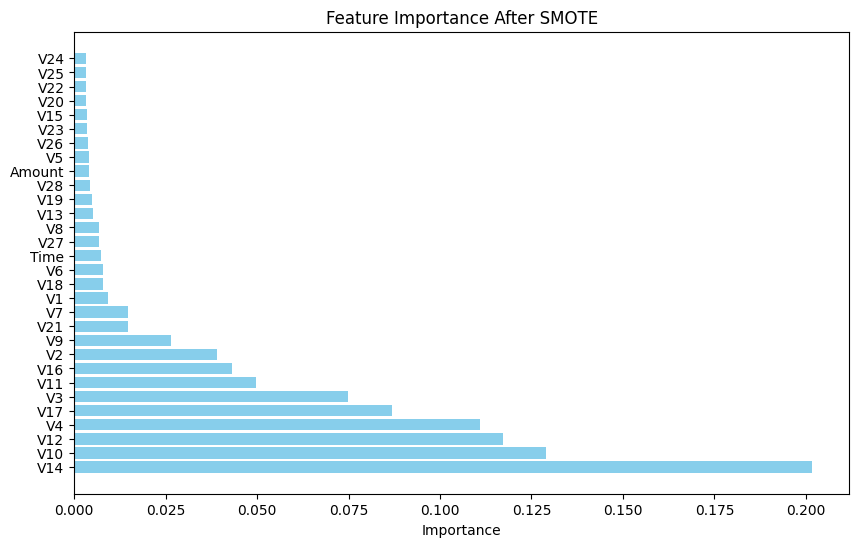

In [20]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler

# ------------------------------
# Feature Scaling After SMOTE
# ------------------------------

# Initialize MinMaxScaler to scale features between 0 and 1
min_max_scaler = MinMaxScaler()

# Apply scaling to X_resampled and convert it back to a DataFrame with original column names
X_resampled_scaled_df = pd.DataFrame(min_max_scaler.fit_transform(X_resampled), columns=X.columns)

# -----------------------------------------
#  Train Random Forest Model (Post-SMOTE)
# -----------------------------------------

# Initialize RandomForestClassifier with 100 trees
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the scaled and resampled dataset
rf_model_smote.fit(X_resampled_scaled_df, y_resampled)

# ----------------------------
#  Get Feature Importances
# ----------------------------

# Extract feature importances from the trained model
feature_importances_smote = rf_model_smote.feature_importances_

# Create a DataFrame mapping features to their importance scores
feature_importance_df_smote = pd.DataFrame({
    'Feature': X_resampled_scaled_df.columns,
    'Importance': feature_importances_smote
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("\n Top 10 Important Features After SMOTE:")
print(feature_importance_df_smote.head(10))

# ------------------------------------
#  Plot Feature Importances (Bar Plot)
# ------------------------------------

# Create a horizontal bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_smote['Feature'], feature_importance_df_smote['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance After SMOTE')
plt.show()


# **TRAINING MODELS (AFTER SMOTE)**

In [27]:
# Import necessary classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib  # For saving trained models

#  Train Logistic Regression
lr_model = LogisticRegression(max_iter=1001, random_state=42)  # Increase max_iter to ensure convergence
lr_model.fit(X_resampled, y_resampled)  # Fit model on resampled (balanced) data

#  Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 decision trees
rf_model.fit(X_resampled, y_resampled)  # Train on resampled data

#  Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  # Disable label encoder warning and set evaluation metric
xgb_model.fit(X_resampled, y_resampled)  # Fit XGBoost on resampled data

#  Save the trained models
joblib.dump(lr_model, "logistic_regression_model_aftersmote.save")  # Save the Logistic Regression model trained on SMOTE data
joblib.dump(rf_model, "random_forest_model_aftersmote.save")  # Save the Random Forest model trained on SMOTE data
joblib.dump(xgb_model, "xgboost_model_aftersmote.save")  # Save the XGBoost model trained on SMOTE data


# Output confirmation
print("Models have been trained and saved successfully After SMOTE.")  # Confirmation message


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:32:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Models have been trained and saved successfully After SMOTE.


# **PREDICTIONS (AFTER SMOTE)**

In [28]:
# Import necessary libraries
import joblib  # For loading the saved models and scaler

# Load the trained models and scaler
lr_model_loaded = joblib.load("logistic_regression_model_aftersmote.save")  # Load the saved Logistic Regression model
rf_model_loaded = joblib.load("random_forest_model_aftersmote.save")  # Load the saved Random Forest model
xgb_model_loaded = joblib.load("xgboost_model_aftersmote.save")  # Load the saved XGBoost model

# Prediction with Logistic Regression (using the resampled test data)
y_pred_logreg_loaded = lr_model_loaded.predict(X_resampled)  # Make predictions on the test data

# Prediction with Random Forest (using the resampled test data)
y_pred_rf_loaded = rf_model_loaded.predict(X_resampled)  # Make predictions on the test data

# Prediction with XGBoost (using the resampled test data)
y_pred_xgb_loaded = xgb_model_loaded.predict(X_resampled)  # Make predictions on the test data

# Print some of the predictions to verify
print("\nPredictions using Logistic Regression model:")
print(y_pred_logreg_loaded[:5])  # Print the first 5 predictions

print("\nPredictions using Random Forest model:")
print(y_pred_rf_loaded[:5])  # Print the first 5 predictions

print("\nPredictions using XGBoost model:")
print(y_pred_xgb_loaded[:5])  # Print the first 5 predictions



Predictions using Logistic Regression model:
[0 0 0 0 0]

Predictions using Random Forest model:
[0 0 0 0 0]

Predictions using XGBoost model:
[0 0 0 0 0]


# **MODELS EVALUATION (AFTER SMOTE)**


Logistic Regression Evaluation:
Accuracy: 0.97923078275856
Precision: 0.9890248999820863
Recall: 0.9692883895131086
F1 Score: 0.9790571893010197
AUC-ROC: 0.9972239149753486
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     85149
           1       0.99      0.97      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589

Confusion Matrix:
 [[84230   919]
 [ 2624 82816]]


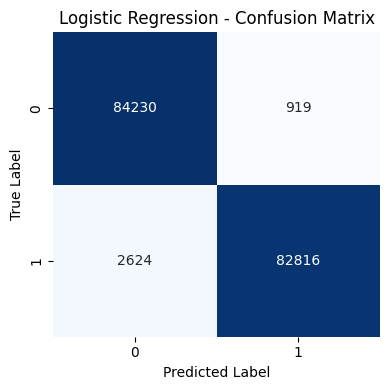


Random Forest Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion Matrix:
 [[85149     0]
 [    0 85440]]


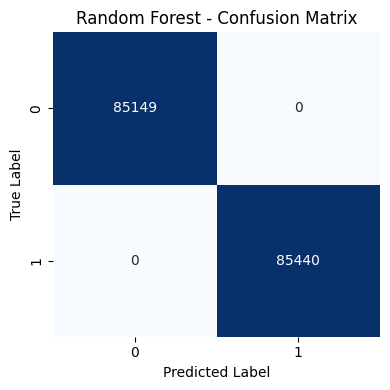


XGBoost Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC-ROC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Confusion Matrix:
 [[85149     0]
 [    0 85440]]


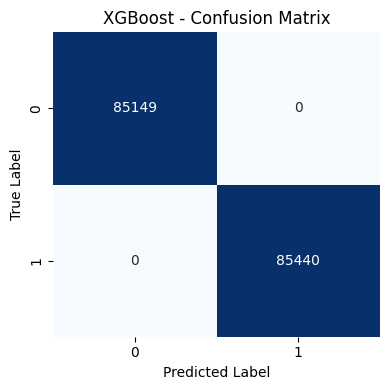

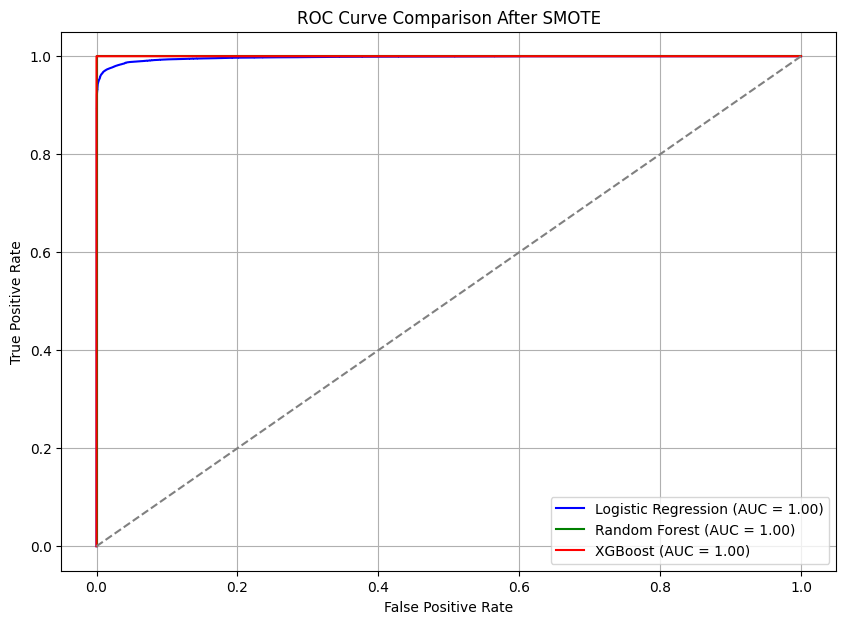

In [29]:
# Import required evaluation metrics and plotting libraries
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization of confusion matrix

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
    plt.figure(figsize=(4, 4))  # Set figure size for better visibility
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # Create heatmap with annotations
    plt.title(f'{model_name} - Confusion Matrix')  # Set title to show which model's matrix it is
    plt.xlabel('Predicted Label')  # Label for the x-axis
    plt.ylabel('True Label')  # Label for the y-axis
    plt.tight_layout()  # Adjust the layout to ensure no overlapping
    plt.show()  # Display the heatmap plot

# ---  Logistic Regression Evaluation ---
y_pred_lr = lr_model.predict(X_test)  # Predict class labels using logistic regression model
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Predict probabilities for ROC AUC (probability for class 1)

# Print evaluation metrics for Logistic Regression
print("\nLogistic Regression Evaluation:")
# Evaluate and print accuracy, precision, recall, F1 score, and AUC
print("Accuracy:", accuracy_score(y_test, y_pred_lr))  # Accuracy of the model
print("Precision:", precision_score(y_test, y_pred_lr))  # Precision of the model
print("Recall:", recall_score(y_test, y_pred_lr))  # Recall of the model
print("F1 Score:", f1_score(y_test, y_pred_lr))  # F1 Score for balance between precision and recall
print("AUC-ROC:", roc_auc_score(y_test, y_prob_lr))  # Area Under the ROC Curve (AUC-ROC)
print("Classification Report:\n", classification_report(y_test, y_pred_lr))  # Detailed classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))  # Print confusion matrix for logistic regression

# Plot confusion matrix for Logistic Regression
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")  # Call function to plot confusion matrix

# ROC Curve data
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)  # Compute False Positive Rate (fpr) and True Positive Rate (tpr)
roc_auc_lr = auc(fpr_lr, tpr_lr)  # Calculate the AUC value for ROC curve

# ---  Random Forest Evaluation ---
y_pred_rf = rf_model.predict(X_test)  # Predict class labels using Random Forest model
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Get probability for class 1 for AUC calculation

# Print evaluation metrics for Random Forest
print("\nRandom Forest Evaluation:")
# Evaluate and print accuracy, precision, recall, F1 score, and AUC for Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))  # Accuracy of the model
print("Precision:", precision_score(y_test, y_pred_rf))  # Precision of the model
print("Recall:", recall_score(y_test, y_pred_rf))  # Recall of the model
print("F1 Score:", f1_score(y_test, y_pred_rf))  # F1 Score
print("AUC-ROC:", roc_auc_score(y_test, y_prob_rf))  # AUC-ROC score
print("Classification Report:\n", classification_report(y_test, y_pred_rf))  # Detailed classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))  # Confusion matrix for random forest

# Plot confusion matrix for Random Forest
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")  # Call function to plot confusion matrix

# ROC Curve data
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)  # Compute ROC curve values (fpr, tpr)
roc_auc_rf = auc(fpr_rf, tpr_rf)  # Compute the AUC for the ROC curve

# ---  XGBoost Evaluation ---
y_pred_xgb = xgb_model.predict(X_test)  # Predict class labels using XGBoost model
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Get probability for class 1 for AUC calculation

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation:")
# Evaluate and print accuracy, precision, recall, F1 score, and AUC for XGBoost model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))  # Accuracy of the model
print("Precision:", precision_score(y_test, y_pred_xgb))  # Precision of the model
print("Recall:", recall_score(y_test, y_pred_xgb))  # Recall of the model
print("F1 Score:", f1_score(y_test, y_pred_xgb))  # F1 Score
print("AUC-ROC:", roc_auc_score(y_test, y_prob_xgb))  # AUC-ROC score
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))  # Detailed classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))  # Confusion matrix for XGBoost

# Plot confusion matrix for XGBoost
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost")  # Call function to plot confusion matrix

# ROC Curve data
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)  # Compute ROC curve (fpr, tpr) for XGBoost
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)  # Calculate the AUC for XGBoost ROC curve

# --- ROC Curve Plot ---
plt.figure(figsize=(10, 7))  # Set figure size for better visualization
# Plot ROC curves for each model with its corresponding AUC value
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')  # Logistic Regression ROC curve
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')      # Random Forest ROC curve
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='red')            # XGBoost ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line (random classifier)
plt.title('ROC Curve Comparison After SMOTE')  # Set title of the plot
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')   # Label for the y-axis
plt.legend(loc='lower right')      # Display the legend in the lower-right corner
plt.grid(True)                     # Add grid lines for readability
plt.show()                         # Display the plot

# **COMPARING MODELS (AFTER SMOTE)**

In [30]:
from sklearn.metrics import accuracy_score  # Import accuracy metric

#  Calculate accuracy for each trained model on test data
accuracy_logreg = accuracy_score(y_test, y_pred_lr)     # Accuracy of Logistic Regression
accuracy_rf = accuracy_score(y_test, y_pred_rf)          # Accuracy of Random Forest
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)        # Accuracy of XGBoost

#  Store the accuracy scores in a dictionary for comparison
model_accuracies = {
    'Logistic Regression': accuracy_logreg,
    'Random Forest': accuracy_rf,
    'XGBoost': accuracy_xgb
}

#  Print the accuracy of each model in a formatted way
print("\n🔹 Model Accuracy Comparison After SMOTE:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")  # Display model name and its accuracy (4 decimal places)



🔹 Model Accuracy Comparison After SMOTE:
Logistic Regression: 0.9792
Random Forest: 1.0000
XGBoost: 1.0000


# **HYPER PARAMETER TUNING AND EVALAUTING THE MODELS AFTER SMOTE**

In [32]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# --- Logistic Regression Hyperparameter Tuning (Using RandomizedSearchCV) ---
param_dist_logreg = {
    'C': uniform(0.01, 10),  # Regularization strength (random distribution)
    'solver': ['liblinear', 'lbfgs']  # Solvers for logistic regression
}

logreg = LogisticRegression(max_iter=1001, random_state=42)  # Increase max_iter to ensure convergence
random_search_logreg = RandomizedSearchCV(logreg, param_distributions=param_dist_logreg,
                                          n_iter=5, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
random_search_logreg.fit(X_train, y_train)

print("\nBest Parameters for Logistic Regression:", random_search_logreg.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", random_search_logreg.best_score_)

# --- Random Forest Hyperparameter Tuning (Using RandomizedSearchCV) ---
param_dist_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf,
                                      n_iter=5, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
random_search_rf.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", random_search_rf.best_score_)

# --- XGBoost Hyperparameter Tuning (Using RandomizedSearchCV) ---
param_dist_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': [3, 6, 10],
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist_xgb,
                                       n_iter=5, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
random_search_xgb.fit(X_train, y_train)

print("\nBest Parameters for XGBoost:", random_search_xgb.best_params_)
print("Best Cross-Validation Accuracy for XGBoost:", random_search_xgb.best_score_)

# --- Best Models with Hyperparameter Tuning ---
best_logreg = random_search_logreg.best_estimator_
best_rf = random_search_rf.best_estimator_
best_xgb = random_search_xgb.best_estimator_

# --- Model Evaluation on Test Data ---
y_pred_logreg_best = best_logreg.predict(X_test)
print("\nLogistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_logreg_best))

y_pred_rf_best = best_rf.predict(X_test)
print("\nRandom Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_best))

y_pred_xgb_best = best_xgb.predict(X_test)
print("\nXGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb_best))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Best Parameters for Logistic Regression: {'C': np.float64(7.3960531262811795), 'solver': 'lbfgs'}
Best Cross-Validation Accuracy for Logistic Regression: 0.9798186619595005
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}
Best Cross-Validation Accuracy for Random Forest: 0.9998291633147703
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:05:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Parameters for XGBoost: {'colsample_bytree': np.float64(0.5374572142203262), 'learning_rate': np.float64(0.033259743896269615), 'max_depth': 10, 'n_estimators': 100, 'subsample': np.float64(0.9618152137934646)}
Best Cross-Validation Accuracy for XGBoost: 0.9993216775578286

Logistic Regression Test Accuracy: 0.9792131966304979

Random Forest Test Accuracy: 0.9998768971035648

XGBoost Test Accuracy: 0.9994255198166353
